# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
# TODO: Fill this in based on where you saved the training and testing data
training_file = 'traffic-signs-data/train.p'
validation_file = 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import csv
import random
import glob
import matplotlib.image as mpimg
import cv2
import numpy as np
from tqdm import tqdm
# Visualizations will be shown in the notebook.
%matplotlib inline


class Summary:
    def __init__(self, X_train, y_train, n_classes):
        self.X_train = X_train
        self.y_train = y_train
        self.n_classes = n_classes
        
    def labels_frequency(self):
        # histogram of label frequency
        hist, bins = np.histogram(self.y_train, bins=n_classes)
        width = 0.75 * (bins[1] - bins[0])
        center = (bins[:-1] + bins[1:]) / 2
        plt.bar(center, hist, align='center', width=width)
        plt.show()
        
    def random_data(self, n=10):
        images = []
        labels = []
        for i in range(n):
            index = random.randint(0, len(self.X_train))
            image = self.X_train[index]
            images.append(image)
            labels.append(self.y_train[index])
        return images, labels
    
    def images_from_a_folder(self, files):
        images = []
        for i, img in enumerate(glob.glob(files)):
            image = cv2.imread(img)
            images.append(image)
        return images
    
    def display_data(self, images, labels, n_rows, n_cols):
        # show image of 'count' random data points
        plt.figure(figsize=(15,6))
        fig, axs = plt.subplots(n_rows, n_cols, figsize=(10,3))
        fig.subplots_adjust(hspace = .5, wspace=.001)
        axs = axs.ravel()

        for i in range(n_cols*n_rows):
            axs[i].axis('off')
            axs[i].imshow(images[i])
            axs[i].set_title(labels[i])

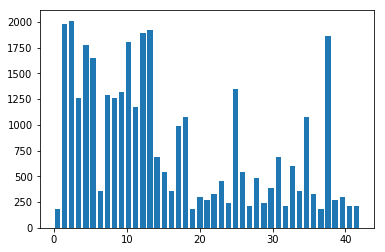

<Figure size 1080x432 with 0 Axes>

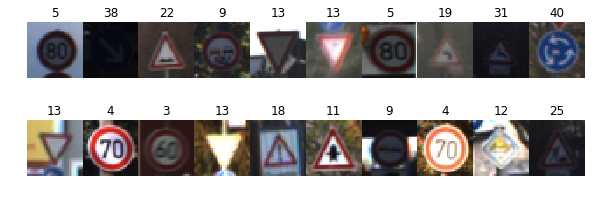

In [4]:
# Training data visualization
#########################################################################
s = Summary(X_train, y_train, 43)  
# Bar char to view frquency of the labels
s.labels_frequency()           

# Display random traffic signs with correct labels
images, labels = s.random_data(20)
s.display_data(images, labels, 2, 10)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
class Preprocess:        
    def convert_to_gray(X):
        # The number of input channels go down to 1
        return np.sum(X/3, axis=3, keepdims=True)

    def normalize(X):
        # Data pixel values get converted to be in (-1,+1)
        return (X-128)/128    

In [6]:
print("Training dataset shape before preprocessing: ", X_train.shape)
print("Training data mean before preprocessing: ", np.mean(X_train))
X_train_gray = Preprocess.convert_to_gray(X_train)
X_train_gray_normalized = Preprocess.normalize(X_train_gray)
X_train = X_train_gray_normalized
print("Training dataset shape after preprocessing: ", X_train.shape)
print("Training data mean aftre preprocessing: ", np.mean(X_train))
print()
print("Validation dataset shape before preprocessing: ", X_valid.shape)
print("Validation data mean before preprocessing: ", np.mean(X_valid))
X_valid_gray = Preprocess.convert_to_gray(X_valid)
X_valid_gray_normalized = Preprocess.normalize(X_valid_gray)
X_valid = X_valid_gray_normalized
print("Validation dataset shape after preprocessing: ", X_valid.shape)
print("Validation data mean aftre preprocessing: ", np.mean(X_valid))
print()
print("Test dataset shape before preprocessing: ", X_test.shape)
print("Test data mean before preprocessing: ", np.mean(X_test))
X_test_gray = Preprocess.convert_to_gray(X_test)
X_test_gray_normalized = Preprocess.normalize(X_test_gray)
X_test = X_test_gray_normalized
print("Test dataset shape after preprocessing: ", X_test.shape)
print("Test data mean aftre preprocessing: ", np.mean(X_test))

Training dataset shape before preprocessing:  (34799, 32, 32, 3)
Training data mean before preprocessing:  82.677589037
Training dataset shape after preprocessing:  (34799, 32, 32, 1)
Training data mean aftre preprocessing:  -0.354081335648

Validation dataset shape before preprocessing:  (4410, 32, 32, 3)
Validation data mean before preprocessing:  83.5564273756
Validation dataset shape after preprocessing:  (4410, 32, 32, 1)
Validation data mean aftre preprocessing:  -0.347215411128

Test dataset shape before preprocessing:  (12630, 32, 32, 3)
Test data mean before preprocessing:  82.1484603612
Test dataset shape after preprocessing:  (12630, 32, 32, 1)
Test data mean aftre preprocessing:  -0.358215153428


In [7]:
class Augment:    
    def random_scaling(self, img):   
        rows,cols,_ = img.shape
        # transform limits
        px = np.random.randint(-3,3)
        pts1 = np.float32([[px,px],[rows-px,px],[px,cols-px],[rows-px,cols-px]])
        pts2 = np.float32([[0,0],[rows,0],[0,cols],[rows,cols]])

        M = cv2.getPerspectiveTransform(pts1,pts2)
        dst = cv2.warpPerspective(img,M,(rows,cols))    
        dst = dst[:,:,np.newaxis]    
        return dst
    
    def random_translate(self, img):
        rows,cols,_ = img.shape
        dx,dy = np.random.randint(-3, 3, 2)

        M = np.float32([[1,0,dx],[0,1,dy]])
        dst = cv2.warpAffine(img,M,(cols,rows))    
        dst = dst[:,:,np.newaxis]    
        return dst
    
    def random_brightness(self, img):
        shifted = img + 1.0   
        img_max_value = max(shifted.flatten())
        max_coef = 2.0/img_max_value
        min_coef = max_coef - 0.1
        coef = np.random.uniform(min_coef, max_coef)
        dst = shifted * coef - 1.0
        return dst
    
    def augment(self, X, y, n_classes, bound):
        X_ = X
        y_ = y
        for c in tqdm(range(n_classes)):
            class_indices = np.where(y_ == c)
            count = len(class_indices[0])
            if count < bound:
                for i in range(count):
                    img = X_[class_indices[0][i]]
                    #img = self.random_brightness(img)
                    img = self.random_scaling(img)
                    img = self.random_translate(img)
                    X_ = np.concatenate((X_, [img]), axis=0)
                    y_ = np.concatenate((y_, [c]), axis=0)
        return X_, y_

aug = Augment()    
    
X_train, y_train = aug.augment(X_train, y_train, 43, 300)
print("Training dataset shape after augmentation: ", X_train.shape)
print("Training data mean aftre augmentation: ", np.mean(X_train))

100%|██████████████████████████████████████████████████████████████████████████████████| 43/43 [05:24<00:00,  7.54s/it]


Training dataset shape after augmentation:  (37199, 32, 32, 1)
Training data mean aftre augmentation:  -0.3484785304


#### 1. Describe how you preprocessed the image data. What techniques were chosen and why did you choose these techniques? Consider including images showing the output of each preprocessing technique. Pre-processing refers to techniques such as converting to grayscale, normalization, etc. (OPTIONAL: As described in the "Stand Out Suggestions" part of the rubric, if you generated additional data for training, describe why you decided to generate additional data, how you generated the data, and provide example images of the additional data. Then describe the characteristics of the augmented training set like number of images in the set, number of images for each class, etc.)



* The first step of preprocessing was to convert the images into grayscale:
    * The reference paper of Sermanet and LeCun suggests that the preprocessing worked well
    * Single channel greatly reduced the training time (I used CPU only)
    * This operation is done using the function convert_to_gray(X)
        * Training dataset shape before preprocessing:  (34799, 32, 32, 3)
        * Training dataset shape after preprocessing:  (34799, 32, 32, 1)
        * Test dataset shape before preprocessing:  (12630, 32, 32, 3)    
        * Test dataset shape after preprocessing:  (12630, 32, 32, 1)
* The second step was to normalize the data in the range [-1, 1].
    * This operation is done using the function normalize(X)
        * Training data mean before preprocessing:  82.677589037
        * Training data mean aftre preprocessing:  -0.354081335648
        * Test data mean before preprocessing:  82.1484603612
        * Test data mean aftre preprocessing:  -0.358215153428    
* As a third step, I have augmented the training dataset with randomly scaled and translated images for classes with less than 300 images
    * This operation is done using the function augment(...) function in the class Augment
        * Initially tried adding random brightness, but later removed as performance did not improve
        * Training dataset shape after augmentation:  (37199, 32, 32, 1)
        * Training data mean aftre augmentation:  -0.348499794801

#### Train-Test split

In [7]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X_train, y_train = shuffle(X_train, y_train)
X_valid, y_valid = shuffle(X_valid, y_valid)

### Model Architecture

In [8]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

#### Layer implemetations: tensorflow-based keras-like wrappers

In [9]:
from tensorflow.contrib.layers import flatten
import tensorflow as tf

class layers:
    from tensorflow.contrib.layers import flatten
    
    def Activation(input, 
                   activation=None):
        if activation=="softmax":
            return tf.nn.softmax(input)        
        elif activation=="relu":
            return tf.nn.relu(input)        
        else:
            return input
    
    def Dense(input, 
              shape, 
              activation=None, 
              mean=0.0, 
              stddev=0.1):
        layer_W = tf.Variable(tf.truncated_normal(shape, mean, stddev))
        layer_b = tf.Variable(tf.zeros(shape[1]))
        layer   = tf.matmul(input, layer_W) + layer_b
        return layers.Activation(layer, activation)
            
    def Conv2D(input, 
               filters,                       
               kernel_size,                       
               in_channels,  
               strides=[1,1],
               activation=None,                       
               padding='VALID',                      
               use_bias=True,                   
               mean=0.0,                       
               stddev=0.1): 
        # Construct Tensorflow shape
        shape = [kernel_size[0], kernel_size[1], in_channels, filters]
        # Initialize tensor with normalized values given mean and stddev
        layer_W = tf.Variable(tf.truncated_normal(shape, mean, stddev))
        # Construct layer using input and weights
        conv_layer = tf.nn.conv2d(input, layer_W, [1, strides[0], strides[1], 1], padding)
        # Add bias if True
        if use_bias==True:            
            b = tf.Variable(tf.zeros(filters))
            layer = tf.nn.bias_add(conv_layer, b)
            return layers.Activation(layer)
        else:
            return layers.Activation(conv_layer)
        
    def MaxPooling2D(input,
                    pool_size,
                    strides,
                    padding='VALID'):
        kernel_size = [1, pool_size[0], pool_size[1], 1]
        strds = [1, strides[0], strides[1], 1]
        return tf.nn.max_pool(input, ksize=kernel_size, strides=strds, padding=padding)
    
    def Flatten(input):
        return flatten(input)

    def Dropout(input, keep_prob):
        return tf.nn.dropout(input, keep_prob)

#### LeNet-like architecture

In [10]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
import tensorflow as tf

class Model:     
    def __init__(self, shape, X_train, y_train, X_valid, y_valid, EPOCHS=10, BATCH_SIZE=100, RATE=0.0005):
        tf.reset_default_graph()
        self.x = tf.placeholder(tf.float32, (None, shape[0], shape[1], shape[2]))
        self.y = tf.placeholder(tf.int32, (None))
        self.one_hot_y = tf.one_hot(self.y, 43)
        self.keep_prob = tf.placeholder(tf.float32)
        
        self.BATCH_SIZE = BATCH_SIZE
        self.EPOCHS = EPOCHS
        self.RATE = RATE
           
         
        self.X_train = X_train
        self.y_train = y_train
        self.X_validation = X_valid
        self.y_validation = y_valid
        
        """    
        self.X_train, self.X_validation, self.y_train, self.y_validation = train_test_split(
            X_train, y_train, test_size=0.20, random_state=42)
        """
    
    def MyLeNet(self, x):        
        # Feature extraction layers
        ###################################################################
        # 5x5 Convolution. Input = 32x32x1. Output = 28x28x6.
        x = layers.Conv2D(x, 6, (5, 5), 1, [1,1], activation="relu")
    
        # Pooling. Input = 28x28x6. Output = 14x14x6.
        x = layers.MaxPooling2D(x, (2, 2), (2, 2))
    
        # 5x5 Convolution. Input = 14x14x6. Output = 10x10x16.
        x = layers.Conv2D(x, 16, (5, 5), 6, [1,1], activation="relu")

        # Pooling. Input = 10x10x16. Output = 5x5x16.    
        x = layers.MaxPooling2D(x, (2, 2), (2, 2))
            
        # Attempt 1    
        ##############################################
        # 5x5 Convolution. Input = 5x5x16. Output = 1x1x400.
        # x = layers.Conv2D(x, 400, (5, 5), 16, [1,1], activation="relu")
        ##############################################
        
        # Attempt 2
        ##############################################
        # 4x4 Convolution. Input = 5x5x16. Output = 2x2x100.
        # x = layers.Conv2D(x, 100, (4, 4), 16, [1,1], activation="relu")        
        # 2x2 Convolution. Input = 2x2x100. Output = 1x1x400.
        # x = layers.Conv2D(x, 400, (2, 2), 100, [1,1], activation="relu")
        ##############################################
        
        # Attempt 3
        ##############################################
        # 2x2 Convolution. Input = 5x5x16. Output = 4x4x50.
        x = layers.Conv2D(x, 50, (2, 2), 16, [1,1], activation="relu")        
        # 3x3 Convolution. Input = 4x4x50. Output = 2x2x100.
        x = layers.Conv2D(x, 100, (3, 3), 50, [1,1], activation="relu")
        # 2x2 Convolution. Input = 2x2x100. Output = 1x1x400.
        x = layers.Conv2D(x, 400, (2, 2), 100, [1,1], activation="relu")
        ##############################################
        
        ###################################################################    
    
        # Prepare for classification layer(s)
        ###################################################################
        # Flatten x. Input = 1x1x400. Output = 400.
        xflat = layers.Flatten(x)
       
        # Dropout
        x = layers.Dropout(xflat, self.keep_prob)
        ###################################################################
    
        # Classification layers
        ###################################################################
        # Fully Connected. Input = 400. Output = 172.
        # fc = layers.Dense(x, (400, 172), "relu")
        # fc = layers.Dense(fc, (172, 86), "relu")
        # logits = layers.Dense(fc, (86, 43))
        
        # Fully Connected. Input = 400. Output = 200.
        fc = layers.Dense(x, (400, 200), "relu")
        # Dropout
        fc = layers.Dropout(fc, self.keep_prob)                        
        # Fully Connected. Input = 200. Output = 43.
        logits = layers.Dense(fc, (200, 43))
        ###################################################################
    
        return logits
    
    def compile(self):
        self.logits = self.MyLeNet(self.x)       
        self.cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=self.logits, 
                                                                labels=self.one_hot_y)
        self.loss_operation = tf.reduce_mean(self.cross_entropy)
        self.optimizer = tf.train.AdamOptimizer(learning_rate = self.RATE)
        self.training_operation = self.optimizer.minimize(self.loss_operation)
        self.correct_prediction = tf.equal(tf.argmax(self.logits, 1), tf.argmax(self.one_hot_y, 1))
        self.accuracy_operation = tf.reduce_mean(tf.cast(self.correct_prediction, tf.float32))
        
    def evaluate(self, X_data, y_data):
        num_examples = len(X_data)
        total_accuracy = 0
        sess = tf.get_default_session()
        for offset in range(0, num_examples, self.BATCH_SIZE):
            batch_x = X_data[offset:offset+self.BATCH_SIZE]
            batch_y = y_data[offset:offset+self.BATCH_SIZE]       
            feed_dict={self.x: batch_x, self.y: batch_y, self.keep_prob: 1.0}
            accuracy = sess.run(self.accuracy_operation, feed_dict)
            total_accuracy += (accuracy * len(batch_x))
        return total_accuracy / num_examples

    def fit(self):
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            num_examples = len(self.X_train)            
            saver = tf.train.Saver()
            print("Training {0} EPOCHS...".format(self.EPOCHS))
            print()
            current_val_accuracy = 0.0
            for i in range(self.EPOCHS):
                
                self.X_train, self.y_train = shuffle(self.X_train, self.y_train)
                for offset in range(0, num_examples, self.BATCH_SIZE):
                    end = offset + self.BATCH_SIZE
                    
                    batch_x = X_train[offset:end]
                    batch_y = y_train[offset:end]
                    feed_dict = {self.x: batch_x, self.y: batch_y, self.keep_prob: 0.5}
                    
                    sess.run(self.training_operation, feed_dict)
            
                validation_accuracy = self.evaluate(self.X_validation, self.y_validation)
                
                print("EPOCH {} ...".format(i+1))                
                print("Validation Accuracy = {:.3f}".format(validation_accuracy))
                if current_val_accuracy < validation_accuracy:
                    saver.save(sess, './mylenet')
                    saver.export_meta_graph('./mylenet.meta')
                    print("Validation accuracy improved from ", current_val_accuracy)
                    current_val_accuracy = validation_accuracy
                    print("Model saved")
                else:
                    print("Validation accuracy did not improve from ", current_val_accuracy)
                print()
        
            
    
    def test(self, X_test, y_test):
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            saver2 = tf.train.import_meta_graph('./mylenet.meta')
            saver2.restore(sess, "./mylenet")
            test_accuracy = self.evaluate(X_test, y_test)
            print("Accuracy = {:.3f}".format(test_accuracy))

    def top_k_probs(self, K, images, normalized_images):
        softmax_logits = tf.nn.softmax(self.logits)
        top_k = tf.nn.top_k(softmax_logits, k=K)

        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            saver = tf.train.import_meta_graph('./mylenet.meta')
            saver.restore(sess, "./mylenet")
            my_softmax_logits = sess.run(softmax_logits, feed_dict={self.x: normalized_images, self.keep_prob: 1.0})
            my_top_k = sess.run(top_k, feed_dict={self.x: normalized_images, self.keep_prob: 1.0})

    
            fig, axs = plt.subplots(len(images),K+1, figsize=(12, 14))
            fig.subplots_adjust(hspace = .4, wspace=.2)
            axs = axs.ravel()

            for i, image in enumerate(images):           
                axs[(K+1)*i].axis('off')
                axs[(K+1)*i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
                axs[(K+1)*i].set_title('input')        

                for j in range(K):
                    guess = my_top_k[1][i][j]
                    index = np.argwhere(self.y_validation == guess)[0]        
                    axs[(K+1)*i+j+1].axis('off')
                    axs[(K+1)*i+j+1].imshow(self.X_validation[index].squeeze(), cmap='gray')        
                    axs[(K+1)*i+j+1].set_title('top guess: {} ({:.0f}%)'.format(guess, 100*my_top_k[0][i][j]))   

#### 2. Describe what your final model architecture looks like including model type, layers, layer sizes, connectivity, etc.) Consider including a diagram and/or table describing the final model.

For convenience of use, I have doen the following:
* Keras-like wrapper functions are created for adding layers to the model
* The Train, Validate, Test mechanism are all integrated within the Model class
* In the LeNet architecture, I have replaced the 5x5 Convolution (input = 5x5x16 and output = 1x1x400) with three Convolution layers consecutively 2x2, 3x3, and 2x2.

My version of LeNet has the following layers:


| Layer | Description | Input | Output | Strides | 
|:-----:|:-----------:|:-----:|:------:|:-------:|
| Convolution | 5x5 | 32x32x1 | 28x28x6 | [1,1] | 
| Activation | ReLU |  |  |  | 
| MaxPool | 2x2 | 28x28x6 | 14x14x6 | [2, 2] |
| Convolution | 5x5 | 14x14x6 | 10x10x16 | [1,1] | 
| Activation | ReLU |  |  |  | 
| MaxPool | 2x2 | 10x10x16 | 5x5x16 | [2, 2] |
| Convolution | 2x2 | 5x5x16 | 4x4x50 | [1,1] | 
| Activation | ReLU |  |  |  | 
| Convolution | 3x3 | 4x4x50 | 2x2x100 | [1,1] | 
| Activation | ReLU |  |  |  | 
| Convolution | 2x2 | 2x2x100 | 1x1x400 | [1,1] | 
| Activation | ReLU |  |  |  | 
| Flatten | | 1x1x400  | 400 |  | 
| Dropout | keep_prob=0.5 |  |  |  | 
| Dense | ReLU | 400 | 200 |  | 
| Dense | ReLU | 200 | 43 |  | 
| Softmax |  |  |  |  | 

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

#### Builld

In [11]:
print(X_train.shape)
m = Model((32, 32, 1), 
          X_train, 
          y_train, 
          X_valid, 
          y_valid, 
          EPOCHS=80, 
          BATCH_SIZE=100, 
          RATE=0.0005)

(34799, 32, 32, 1)


#### Compile 

In [12]:
m.compile()

#### Fit 

In [13]:
m.fit()

Training 80 EPOCHS...

EPOCH 1 ...
Validation Accuracy = 0.831
Validation accuracy improved from  0.0
Model saved

EPOCH 2 ...
Validation Accuracy = 0.908
Validation accuracy improved from  0.830838991671
Model saved

EPOCH 3 ...
Validation Accuracy = 0.929
Validation accuracy improved from  0.907936525183
Model saved

EPOCH 4 ...
Validation Accuracy = 0.937
Validation accuracy improved from  0.928571424787
Model saved

EPOCH 5 ...
Validation Accuracy = 0.948
Validation accuracy improved from  0.937414971339
Model saved

EPOCH 6 ...
Validation Accuracy = 0.954
Validation accuracy improved from  0.947619054053
Model saved

EPOCH 7 ...
Validation Accuracy = 0.955
Validation accuracy improved from  0.953514737337
Model saved

EPOCH 8 ...
Validation Accuracy = 0.952
Validation accuracy did not improve from  0.954648523104

EPOCH 9 ...
Validation Accuracy = 0.960
Validation accuracy improved from  0.954648523104
Model saved

EPOCH 10 ...
Validation Accuracy = 0.960
Validation accuracy did n

#### Validation set accuracy

In [14]:
m.test(X_valid, y_valid)

INFO:tensorflow:Restoring parameters from ./mylenet
Accuracy = 0.977


#### Test set accuracy

In [16]:
m.test(X_test, y_test)

INFO:tensorflow:Restoring parameters from ./mylenet
Accuracy = 0.945


#### 3. Describe how you trained your model. The discussion can include the type of optimizer, the batch size, number of epochs and any hyperparameters such as learning rate.

I have used Adam optimizer and with the following parameter settings:
* Epochs: 80
* Batch size: 100
* Learning rate: 0.0005
* Mean and Standard deviation: 0.0 and 0.1, respectively
* Dropout (keep) probability: 0.5

#### 4. Describe the approach taken for finding a solution and getting the validation set accuracy to be at least 0.93. Include in the discussion the results on the training, validation and test sets and where in the code these were calculated. Your approach may have been an iterative process, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think the architecture is suitable for the current problem.

My final model results were:
* Validation set accuracy: 97.4%
* Test set accuracy: 94.5%

The model is saved only if the validation score improved.

I have used the LeNet Architecture as a basis for my architecture. Then I have obtained iterative improvements in validation and test accuracies as follows:
* Feature extraction part:
    * Attempt 1: Single convolution layer before flattening: 5x5 Convolution. Input = 5x5x16. Output = 1x1x400.
    * Attempt 2: Replace Attempt 1 layer with two convolution layers 
        * 4x4 Convolution. Input = 5x5x16. Output = 2x2x100.
        * 2x2 Convolution. Input = 2x2x100. Output = 1x1x400.
    * Attempt 3: Replace Attempt 2 layer with three convolution layers 
        * 2x2 Convolution. Input = 5x5x16. Output = 4x4x50.
        * 3x3 Convolution. Input = 4x4x50. Output = 2x2x100.
        * 2x2 Convolution. Input = 2x2x100. Output = 1x1x400.
* Classification part:
    * Attempt 1: Dense(400, 172) -> Dense(172, 86) -> Dense(86, 43)
    * Attempt 2: Dense(400, 200) -> Dropout() -> Dense(200, 43)    
    * Adding a dropout helped avoid overfitting and in turn improved test accuracy
* Parameter tuning part:
    * Final dropout probability: 0.5
    * Final learning rate: 0.0005
    
* Underfitting was not a problem in all the attempts

* I think the model is performing quite well as all three of Training, Validation, and Test accuracies are more than 94.5%

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

#### 1. Choose five German traffic signs found on the web and provide them in the report. For each image, discuss what quality or qualities might be difficult to classify.

### Load and Output the Images

(6, 32, 32, 1)


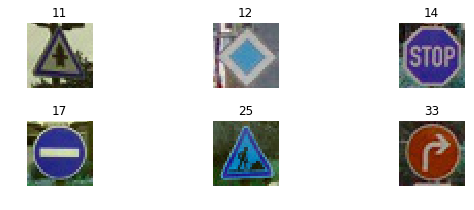

In [243]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

my_images = s.images_from_a_folder(files="./my-traffic-signs/*.jpg")

my_labels = [11, 12, 14, 17, 25, 33]
s.display_data(my_images, my_labels, 2, 3)    
    
my_images_gray = Preprocess.convert_to_gray(np.asarray(my_images)) 
my_images_normalized = Preprocess.normalize(my_images_gray)

print(my_images_normalized.shape)

### Predict the Sign Type for Each Image

In [244]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
m.test(my_images_normalized, my_labels)

INFO:tensorflow:Restoring parameters from ./mylenet
Accuracy = 1.000


### Analyze Performance

#### 2. Discuss the model's predictions on these new traffic signs and compare the results to predicting on the test set. At a minimum, discuss what the predictions were, the accuracy on these new predictions, and compare the accuracy to the accuracy on the test set (OPTIONAL: Discuss the results in more detail as described in the "Stand Out Suggestions" part of the rubric).* The model predicted with 100% accuracy

* The model predicted the 6 new images with 100% accuracy

* Better than the 97.4% validation accuracy and 94.5% test accuracy
* More real-world data points would decrease the accuracy from 1.0
* Given that the images are quite clear compared to several training set images, it is likely that the model will work well on random real world German traffic signal images

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

#### 3. Describe how certain the model is when predicting on each of the five new images by looking at the softmax probabilities for each prediction. Provide the top 5 softmax probabilities for each image along with the sign type of each probability. (OPTIONAL: as described in the "Stand Out Suggestions" part of the rubric, visualizations can also be provided such as bar charts)

INFO:tensorflow:Restoring parameters from ./mylenet


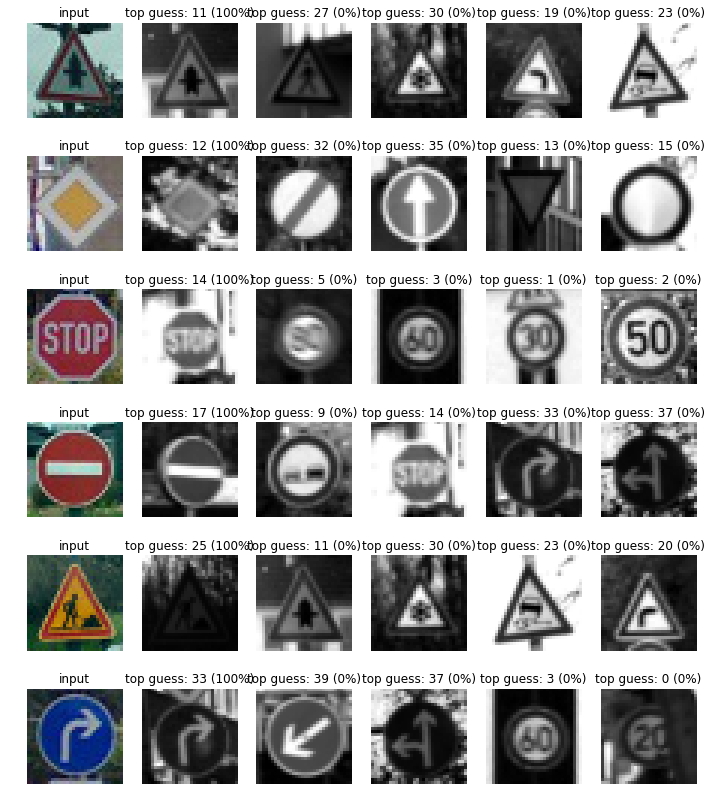

In [245]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

m.top_k_probs(5, my_images, my_images_normalized)

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")